In [1]:
pip install voila

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd

In [3]:
##GET THE DATA
rating_data = pd.read_csv('ratings.csv')
rating_data.head(5)

,userId,movieId,rating,timestamp
0,249,527,5.0,13/7/1996 1:56
1,249,588,4.0,6/7/1996 7:56
2,249,589,4.0,6/7/1996 8:01
3,249,590,4.0,6/7/1996 7:55
4,249,592,4.0,6/7/1996 7:55


In [4]:
movie_data = pd.read_csv('movie.csv')
movie_data.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
df = pd.merge(rating_data, movie_data,on='movieId')
df.head(5)

,userId,movieId,rating,timestamp,title,genres
0,249,527,5.0,13/7/1996 1:56,Schindler's List (1993),Drama|War
1,258,527,3.5,7/9/2008 2:58,Schindler's List (1993),Drama|War
2,260,527,4.0,24/3/2015 20:47,Schindler's List (1993),Drama|War
3,266,527,4.0,29/7/2011 8:28,Schindler's List (1993),Drama|War
4,271,527,4.0,29/10/2008 0:33,Schindler's List (1993),Drama|War


In [6]:
##EDA
#EXPLORE THE DATA AND GET A LOOK AT SOME OF THE BEST RATED MOVIES
#VISUALIZATION IMPORTS
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [7]:
#CREATE A RATINGS DATAFRAME WITH AVERAGE RATING AND NUMBER OF RATINGS
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Bar Girls (1994)                  5.0
Fateless (Sorstalanság) (2005)    5.0
Import/Export (2007)              5.0
Seven Days in Utopia (2011)       5.0
Barfi! (2012)                     5.0
Name: rating, dtype: float64

In [8]:
#CREATE A RATINGS DATAFRAME WITH COUNT NUMBER OF RATINGS
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Pulp Fiction (1994)                 3345
Forrest Gump (1994)                 3323
Silence of the Lambs, The (1991)    3123
Shawshank Redemption, The (1994)    3089
Jurassic Park (1993)                2997
Name: rating, dtype: int64

In [9]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
$5 a Day (2008),3.300000
'Hellboy': The Seeds of Creation (2004),3.125000
'Neath the Arizona Skies (1934),3.500000
'R Xmas (2001),3.000000
'Round Midnight (1986),3.785714


In [10]:
#NOW SET THE NUMBER OF RATINGS COLUMN
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,num of ratings
title,,
$5 a Day (2008),3.300000,5
'Hellboy': The Seeds of Creation (2004),3.125000,4
'Neath the Arizona Skies (1934),3.500000,2
'R Xmas (2001),3.000000,1
'Round Midnight (1986),3.785714,7


<AxesSubplot:>

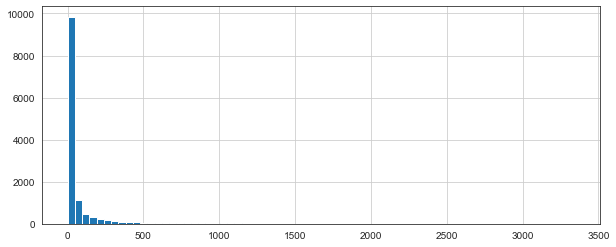

In [11]:
#HISTOGRAMS
plt.figure(figsize=(10,4))
ratings['num of ratings'].hist(bins=70)

<AxesSubplot:>

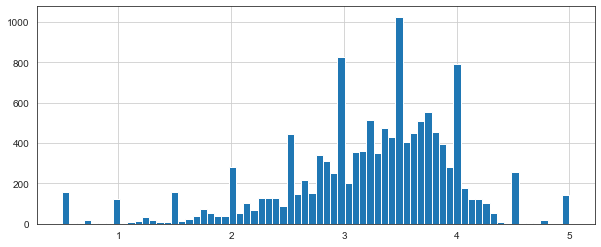

In [12]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)

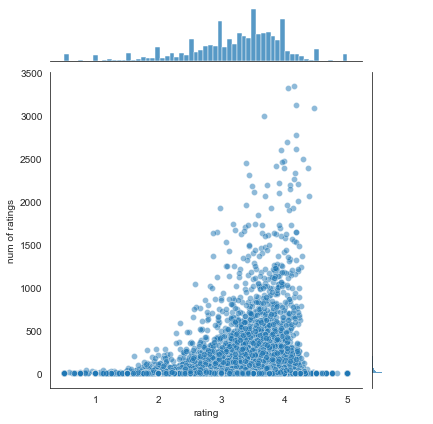

In [13]:
sns.jointplot(x='rating', y='num of ratings',data=ratings,alpha=0.5)

In [14]:
##RECOMMENDING SIMILAR MOVIES
#Lets create a matrix that has the user ids on one access and the movie title on another axis.
#Each cell consiss the rating that users give for that movie. 
#Lot of NaN values because most people have not seen most of the movies.
moviematrix = df.pivot_table(index='userId', columns='title', values='rating')
moviematrix


title,$5 a Day (2008),'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'R Xmas (2001),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),...,[REC]² (2009),[REC]³ 3 Génesis (2012),"\\""Great Performances\""\"" Cats (1998)""",eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nos amours (1983),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN
252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
#MOST RATED MOVIES
ratings.sort_values('num of ratings',ascending=False).head(10)

,rating,num of ratings
title,,
Pulp Fiction (1994),4.154858,3345
Forrest Gump (1994),4.059585,3323
"Silence of the Lambs, The (1991)",4.187480,3123
"Shawshank Redemption, The (1994)",4.468113,3089
Jurassic Park (1993),3.682516,2997
Star Wars: Episode IV - A New Hope (1977),4.189257,2774
Braveheart (1995),4.044527,2695
"Matrix, The (1999)",4.180790,2608
Terminator 2: Judgment Day (1991),3.950962,2600


In [16]:
#CHOOSE TWO MOVIES: PULP FICTION(1994); A COMEDY MOVIE. AND FORREST GUMP(1994); A ROMANCE MOVIE.
ratings.head()

,rating,num of ratings
title,,
$5 a Day (2008),3.300000,5
'Hellboy': The Seeds of Creation (2004),3.125000,4
'Neath the Arizona Skies (1934),3.500000,2
'R Xmas (2001),3.000000,1
'Round Midnight (1986),3.785714,7


In [17]:
#GRAB THE USER RATINGS FOR THOSE TWO CHOSEN MOVIES
pulpfiction_user_ratings = moviematrix['Pulp Fiction (1994)']
forrestgump_user_ratings = moviematrix['Forrest Gump (1994)']
pulpfiction_user_ratings.head()


userId
249    NaN
250    NaN
251    NaN
252    5.0
253    4.0
Name: Pulp Fiction (1994), dtype: float64

In [19]:
#THEN USE CORRWITH() METHOD TO GET CORRELATIONS BETWEEN TWO PANDAS SERIES.
similar_to_pulpfiction = moviematrix.corrwith(pulpfiction_user_ratings)
similar_to_forrestgump = moviematrix.corrwith(forrestgump_user_ratings)

C:\Users\Nazrah\anaconda3\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\Nazrah\anaconda3\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [20]:
#CLEAN THIS BY REMOVING NaN VALUES AND USING A DATAFRAME INSTEAD OF A SERIES
corr_pulpfiction = pd.DataFrame(similar_to_pulpfiction,columns=['Correlation'])
corr_pulpfiction.dropna(inplace=True)
corr_pulpfiction.head()

,Correlation
title,
'Round Midnight (1986),0.833333
'Salem's Lot (2004),0.683130
'Til There Was You (1997),-0.100167
"'burbs, The (1989)",-0.060893
(500) Days of Summer (2009),0.069833


In [21]:
#NOW IF WE SORT THE DATAFRAME BY CORRELATION, WE ET THE MOST SIMILAR MOVIES, HOWEVER IT IS NOT LOGIC RESULT.
#BECAUSE A LOT MOVIES ONLY WATCHED ONCE BY USERS WHO ALSO WATCHED PULP FICTION(1994)IT WAS A MOST POPULAR MOVIE
corr_pulpfiction.sort_values('Correlation',ascending=False).head(10)


,Correlation
title,
Fingers (1978),1.0
"Son of Kong, The (1933)",1.0
In Old California (1942),1.0
In This World (2002),1.0
Parallel Sons (1995),1.0
Paranormal Activity 4 (2012),1.0
"Dentist, The (1996)",1.0
Stolen (2012),1.0
Still of the Night (1982),1.0


In [22]:
#FIX THIS BY FILTER OUT MOVIES THAT HAVE LESS THAN 100 REVIEWS (REFER TO HISTOGRAM)
corr_pulpfiction = corr_pulpfiction.join(ratings['num of ratings'])
corr_pulpfiction.head()

,Correlation,num of ratings
title,,
'Round Midnight (1986),0.833333,7
'Salem's Lot (2004),0.683130,7
'Til There Was You (1997),-0.100167,37
"'burbs, The (1989)",-0.060893,158
(500) Days of Summer (2009),0.069833,266


In [23]:
#SORT THE VALUES AND NOTICE HOW TITLES MAKE A LOT MORE SENSE
corr_pulpfiction[corr_pulpfiction['num of ratings']>100].sort_values('Correlation', ascending=False).head()

,Correlation,num of ratings
title,,
Pulp Fiction (1994),1.000000,3345
Reservoir Dogs (1992),0.534329,1353
Sexy Beast (2000),0.418271,116
Kill Bill: Vol. 2 (2004),0.402505,967
Django Unchained (2012),0.398381,212


In [24]:
#NOW THE SAME FOR FORREST GUMP MOVIE
corr_forrestgump = pd.DataFrame(similar_to_forrestgump,columns=['Correlation'])
corr_forrestgump.dropna(inplace=True)
corr_forrestgump = corr_forrestgump.join(ratings['num of ratings'])
corr_forrestgump[corr_forrestgump['num of ratings']>100].sort_values('Correlation', ascending=False).head()


,Correlation,num of ratings
title,,
Forrest Gump (1994),1.000000,3323
Flipper (1996),0.491712,107
Rain Man (1988),0.465236,1228
Turner & Hooch (1989),0.460617,132
How to Make an American Quilt (1995),0.453042,140
